# SD212: Graph Learning

## Lab 7: Graph Neural Networks

In this lab, you will learn to classify nodes using a graph neural network (GNN).

## Import

In [1]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt

In [2]:
from sknetwork.classification import get_accuracy_score
from sknetwork.data import load_netset
from sknetwork.embedding import Spectral
from sknetwork.gnn import GNNClassifier
from sknetwork.utils import directed2undirected
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from IPython.display import SVG
from sknetwork.visualization import visualize_graph
from sknetwork.ranking import PageRank

## Data

We will work on the following datasets (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Cora (directed graph + bipartite graph)
* WikiVitals (directed graph + bipartite graph)

Both datasets are graphs with node features (given by the bipartite graph) and ground-truth labels.

In [3]:
cora = load_netset('cora')
wikivitals = load_netset('wikivitals')

Parsing files...
Done.
Parsing files...
Done.


In [4]:
def visualize_embedding(embedding, labels, size=(6,6)):
    """Visualize embedding in 2 dimensions using TSNE. """
    tsne = TSNE(random_state=8).fit_transform(embedding)
    fig, ax = plt.subplots(1, 1, figsize=size)
    plt.scatter(tsne[:, 0], tsne[:, 1], c=labels, s=50)
    plt.xticks([])
    plt.yticks([])
    plt.show()

## 1. Cora

We start with the Cora dataset. We check the embedding of the nodes before and after learning, and the impact of the GNN architecture on accuracy.

In [8]:
dataset = cora

In [9]:
adjacency = dataset.adjacency
features = dataset.biadjacency
labels_true = dataset.labels

In [10]:
# we use undirected graphs
adjacency = directed2undirected(adjacency)

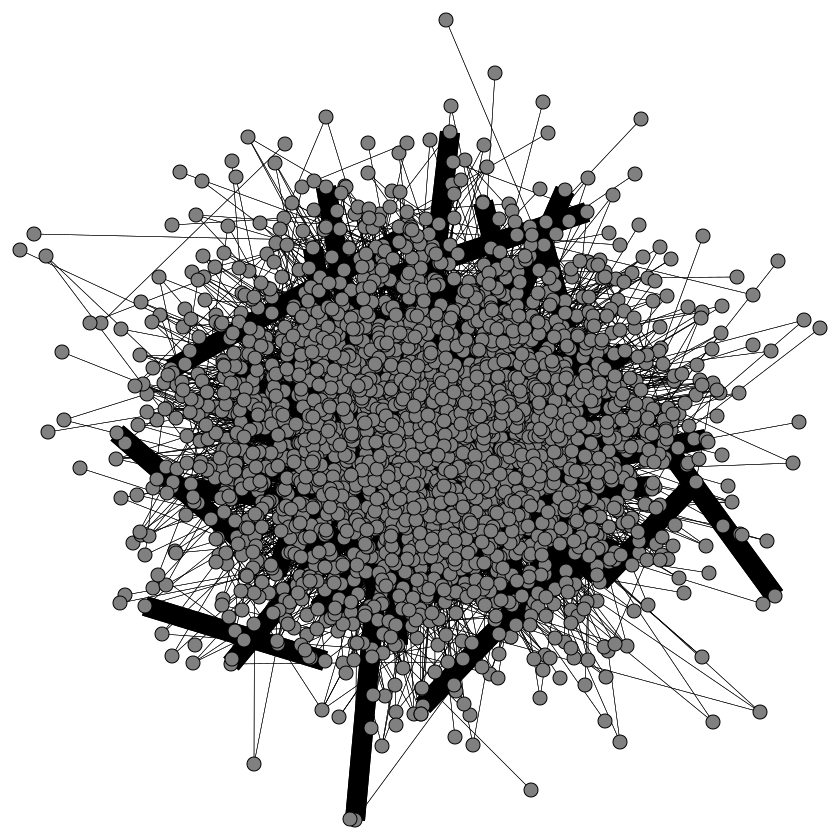

In [11]:
SVG(visualize_graph(adjacency, width=800, height=800))

## To do

Consider a GNN with a single hidden layer of dimension 16.

* Run a single forward pass on the data, without learning.
* Display the corresponding embedding.

In [12]:
hidden_dim = 16

In [13]:
n_labels = len(set(labels_true))

In [14]:
gnn = GNNClassifier(dims=[hidden_dim, n_labels], verbose=True)

In [17]:
gnn

GNNClassifier(
    Convolution(layer_type: conv, out_channels: 16, activation: ReLu, use_bias: True, normalization: both, self_embeddings: True)
    Convolution(layer_type: conv, out_channels: 7, activation: Cross entropy, use_bias: True, normalization: both, self_embeddings: True)
)

In [13]:
embedding = gnn.forward(adjacency, features)

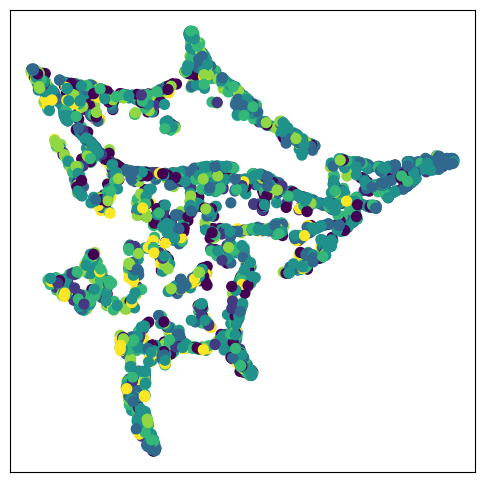

In [14]:
visualize_embedding(embedding, labels_true)

## To do

We now train the GNN.

* Train the GNN with 50% / 50% train / test split.
* Give the accuracy of classification on the train and test sets. 
* Give the total number of parameters.
* Display the obtained node embeddings.
* Add a hidden layer to the model and compare performance. <br>What do you observe?
* Give the accuracy obtained with the initial GNN (a single hidden layer) trained on an empty graph.<br> What is the corresponding learning model?

In [15]:
features.shape[0] 

2708

In [17]:
train_set, test_set = train_test_split(np.arange(len(labels_true)), test_size=0.5)
labels_pred = gnn.fit_predict(adjacency, features, {i: labels_true[i] for i in train_set})
print("Accuracy on train set : {}".format(np.round(np.mean(labels_pred[train_set] == labels_true[train_set]), 2)))
print("Accuracy on test set : {}".format(np.round(np.mean(labels_pred[test_set] == labels_true[test_set]), 2)))
print("Number of parameters : {}".format(features.shape[0] * hidden_dim + hidden_dim))

In epoch   0, loss: 1.279, train accuracy: 0.890
In epoch  10, loss: 1.208, train accuracy: 0.970
In epoch  20, loss: 1.189, train accuracy: 0.987
In epoch  30, loss: 1.179, train accuracy: 0.993
In epoch  40, loss: 1.175, train accuracy: 0.994
In epoch  50, loss: 1.172, train accuracy: 0.997
In epoch  60, loss: 1.171, train accuracy: 0.998
In epoch  70, loss: 1.170, train accuracy: 0.999
In epoch  80, loss: 1.169, train accuracy: 0.999
In epoch  90, loss: 1.169, train accuracy: 0.999
Accuracy on train set : 1.0
Accuracy on test set : 0.88
Number of parameters : 43344


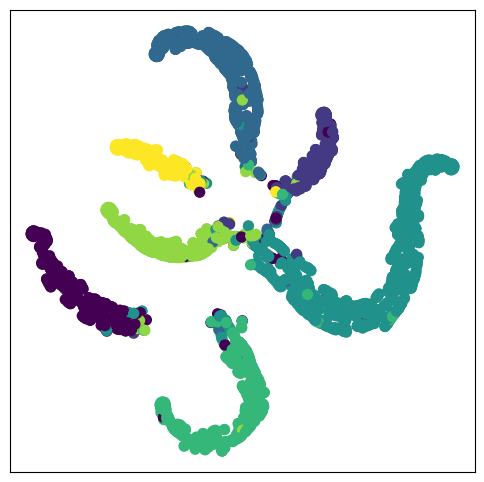

In [18]:
visualize_embedding(gnn.forward(adjacency, features), labels=labels_true)

In epoch   0, loss: 2.095, train accuracy: 0.064
In epoch  10, loss: 1.812, train accuracy: 0.362
In epoch  20, loss: 1.642, train accuracy: 0.607
In epoch  30, loss: 1.545, train accuracy: 0.744
In epoch  40, loss: 1.439, train accuracy: 0.816
In epoch  50, loss: 1.356, train accuracy: 0.866
In epoch  60, loss: 1.306, train accuracy: 0.905
In epoch  70, loss: 1.270, train accuracy: 0.934
In epoch  80, loss: 1.242, train accuracy: 0.948
In epoch  90, loss: 1.224, train accuracy: 0.962
Accuracy on train set : 0.97
Accuracy on test set : 0.8
Number of parameters : 43600


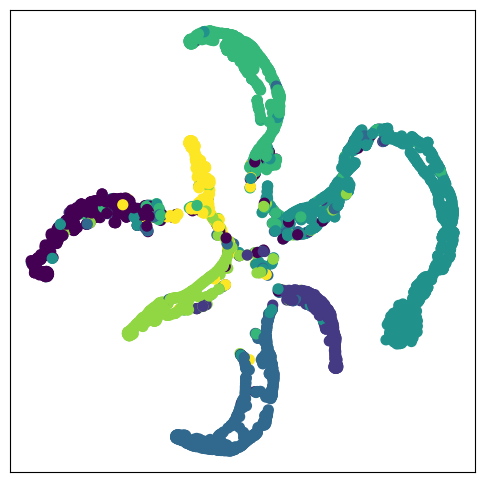

In [18]:
gnn = GNNClassifier(dims=[hidden_dim, hidden_dim, n_labels], verbose=True)
labels_pred = gnn.fit_predict(adjacency, features, {i: labels_true[i] for i in train_set})
print("Accuracy on train set : {}".format(np.round(np.mean(labels_pred[train_set] == labels_true[train_set]), 2)))
print("Accuracy on test set : {}".format(np.round(np.mean(labels_pred[test_set] == labels_true[test_set]), 2)))
print("Number of parameters : {}".format(features.shape[0] * hidden_dim + hidden_dim * hidden_dim + hidden_dim))
visualize_embedding(gnn.forward(adjacency, features), labels=labels_true)

In epoch   0, loss: 1.999, train accuracy: 0.119
In epoch  10, loss: 1.841, train accuracy: 0.366
In epoch  20, loss: 1.687, train accuracy: 0.633
In epoch  30, loss: 1.508, train accuracy: 0.786
In epoch  40, loss: 1.354, train accuracy: 0.909
In epoch  50, loss: 1.262, train accuracy: 0.962
In epoch  60, loss: 1.219, train accuracy: 0.988
In epoch  70, loss: 1.197, train accuracy: 0.996
In epoch  80, loss: 1.187, train accuracy: 0.997
In epoch  90, loss: 1.181, train accuracy: 0.998
Accuracy on train set : 1.0
Accuracy on test set : 0.83
Number of parameters : 43344


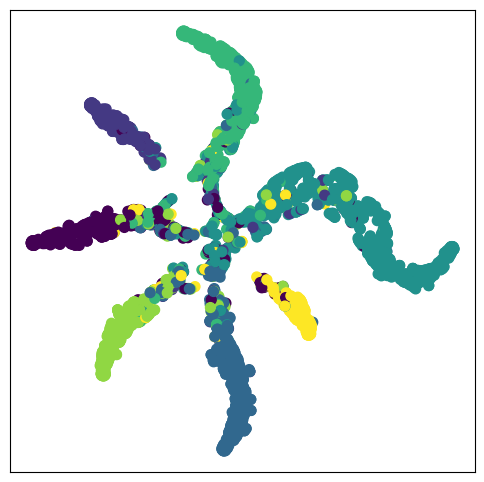

In [19]:
gnn = GNNClassifier(dims=[hidden_dim, n_labels], verbose=True)
zeros = sparse.csr_matrix((adjacency.shape[0], adjacency.shape[0]))
labels_pred = gnn.fit_predict(zeros, features, labels={i: labels_true[i] for i in train_set})
print("Accuracy on train set : {}".format(np.round(np.mean(labels_pred[train_set] == labels_true[train_set]), 2)))
print("Accuracy on test set : {}".format(np.round(np.mean(labels_pred == labels_true), 2)))
print("Number of parameters : {}".format(features.shape[0] * hidden_dim + hidden_dim))
visualize_embedding(gnn.forward(zeros, features), labels=labels_true)

The corresponding model is a neural network.

## 2. Wikivitals

We now focus on Wikivitals. 

In [42]:
adjacency = wikivitals.adjacency
features = wikivitals.biadjacency
labels_true = wikivitals.labels
names_labels = wikivitals.names_labels
names = wikivitals.names

In [21]:
# we use undirected graphs
adjacency = directed2undirected(adjacency)

### To do

* Predict node labels using a GNN with GraphSage layers. 
<br> Use train / validation / test splits with 10% for  validation.
* Display the loss and accuracy on the train set at each epoch.
* Display the obtained node embeddings.
* Give the top-5 articles (in terms of Pagerank) of each predicted category.
* Give the accuracy per category.

In [22]:
n_labels = len(set(labels_true))

In [28]:
gnn = GNNClassifier(dims=[hidden_dim, n_labels], layer_types='Sage', verbose=True)

In [29]:
train_set, test_set = train_test_split(np.arange(len(labels_true)), test_size=0.1)
labels_pred = gnn.fit_predict(adjacency, features, {i: labels_true[i] for i in train_set}, n_epochs=500)
print("Accuracy on train set : {}".format(np.round(np.mean(labels_pred[train_set] == labels_true[train_set]), 2)))
print("Accuracy on test set : {}".format(np.round(np.mean(labels_pred[test_set] == labels_true[test_set]), 2)))

In epoch   0, loss: 2.492, train accuracy: 0.051
In epoch  50, loss: 1.899, train accuracy: 0.708
In epoch 100, loss: 1.677, train accuracy: 0.889
In epoch 150, loss: 1.610, train accuracy: 0.944
In epoch 200, loss: 1.581, train accuracy: 0.970
In epoch 250, loss: 1.568, train accuracy: 0.981
In epoch 300, loss: 1.562, train accuracy: 0.986
In epoch 350, loss: 1.558, train accuracy: 0.989
In epoch 400, loss: 1.556, train accuracy: 0.990
In epoch 450, loss: 1.554, train accuracy: 0.992
Accuracy on train set : 0.99
Accuracy on test set : 0.78


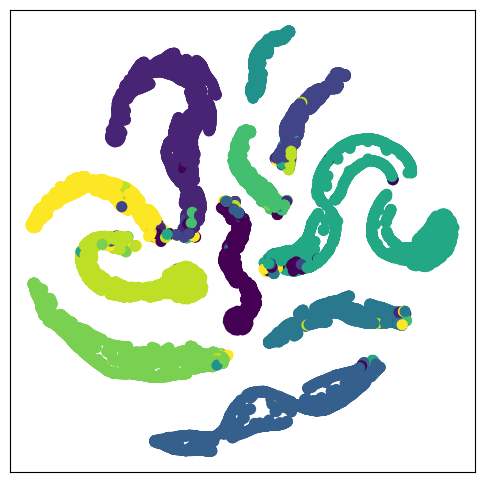

In [30]:
visualize_embedding(gnn.forward(adjacency, features), labels=labels_true)

In [44]:
pagerank = PageRank()
scores = pagerank.fit_predict(adjacency)
top_scores = np.argsort(scores)[::-1]

for i in range(n_labels):
    print('Top 5 nodes for label {}:'.format(names_labels[i]))
    c = 0
    j = 0
    while c < 5:
        if labels_pred[top_scores[j]] == i:
            print(names[top_scores[j]])
            c += 1
        j += 1
    print()

Top 5 nodes for label Arts:
United Kingdom
Encyclopædia Britannica
Oxford English Dictionary
Romanticism
Vienna

Top 5 nodes for label Biological and health sciences:
Taxonomy (biology)
Animal
Protein
Bacteria
Plant

Top 5 nodes for label Everyday life:
The Washington Post
Association football
Harvard University
Basketball
Olympic Games

Top 5 nodes for label Geography:
United States
Geographic coordinate system
India
China
France

Top 5 nodes for label History:
World War II
World War I
Soviet Union
Middle Ages
Roman Empire

Top 5 nodes for label Mathematics:
Mathematics
Real number
Statistics
Geometry
Function (mathematics)

Top 5 nodes for label People:
Aristotle
Plato
Isaac Newton
Albert Einstein
Augustine of Hippo

Top 5 nodes for label Philosophy and religion:
Christianity
Islam
Buddhism
Catholic Church
Hinduism

Top 5 nodes for label Physical sciences:
Oxygen
Earth
Köppen climate classification
Physics
Carbon dioxide

Top 5 nodes for label Society and social sciences:
The New Yor

In [46]:
print('Per category accuracy :')
for i in range(n_labels):
    print('Accuracy for label {} : {}'.format(names_labels[i], np.round(np.sum((labels_pred == i) & (labels_true == i)) / np.sum(labels_true == i), 2)))

Per category accuracy :
Accuracy for label Arts : 0.95
Accuracy for label Biological and health sciences : 0.98
Accuracy for label Everyday life : 0.93
Accuracy for label Geography : 0.98
Accuracy for label History : 0.96
Accuracy for label Mathematics : 0.98
Accuracy for label People : 0.98
Accuracy for label Philosophy and religion : 0.95
Accuracy for label Physical sciences : 0.98
Accuracy for label Society and social sciences : 0.97
Accuracy for label Technology : 0.96
